In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50) 

In [3]:
stud = pd.read_csv('stud_math.xls')

In [4]:
display(stud)
display(stud.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

In [24]:
def change_none(column): # замена пропусков в числовых столбцах
    if column != 'score':
        stud[column] = stud[column].apply(lambda x: stud[column].median()
                                          if pd.isna(x) == True else x)

def fix_none(column): # замена пропусков в строковых столбцах
    stud[column] = stud[column].apply(lambda x: stud[column].value_counts().index[0] 
                                                if pd.isna(x)== True else x)

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

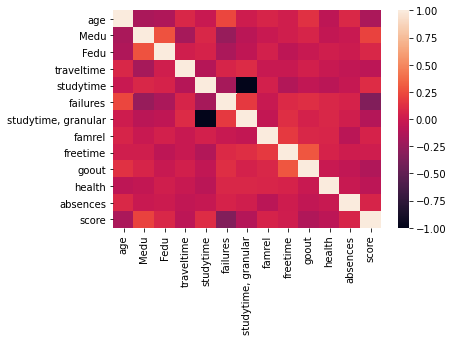

In [6]:
sns.heatmap(stud.corr())

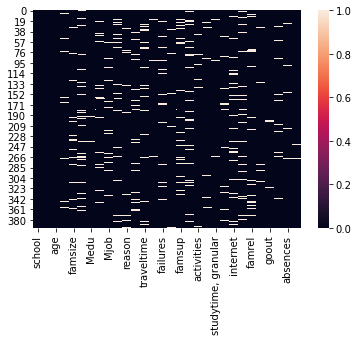

In [7]:
sns.heatmap(stud.isnull())

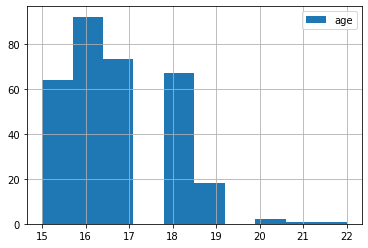

In [27]:
stud.age.hist(bins = 10, label = 'age')
plt.legend();

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
Уникальных значений: 36


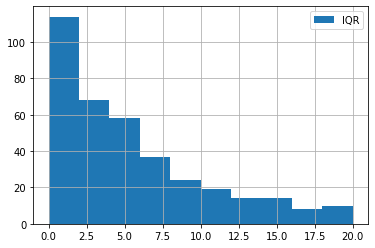

In [8]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, label = 'IQR')
 
plt.legend();
print("Уникальных значений:", stud.absences.nunique())

stud = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [9]:
stud.Fedu.value_counts()

2.0     99
3.0     86
4.0     79
1.0     76
0.0      2
40.0     1
Name: Fedu, dtype: int64

In [10]:
stud = stud.loc[stud.Fedu.between(0, 4)]
stud.Fedu.value_counts()

2.0    99
3.0    86
4.0    79
1.0    76
0.0     2
Name: Fedu, dtype: int64

In [11]:
stud.famrel.value_counts()

 4.0    153
 5.0     91
 3.0     53
 2.0     14
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [12]:
stud = stud.loc[stud.famrel.between(1, 5)]
stud.famrel.value_counts()

4.0    153
5.0     91
3.0     53
2.0     14
1.0      7
Name: famrel, dtype: int64

In [13]:
columns_list = stud.select_dtypes(include='number').columns 
for column in columns_list:
    change_none(column)
print(stud.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               318 non-null    object 
 1   sex                  318 non-null    object 
 2   age                  318 non-null    int64  
 3   address              306 non-null    object 
 4   famsize              298 non-null    object 
 5   Pstatus              283 non-null    object 
 6   Medu                 318 non-null    float64
 7   Fedu                 318 non-null    float64
 8   Mjob                 303 non-null    object 
 9   Fjob                 291 non-null    object 
 10  reason               304 non-null    object 
 11  guardian             290 non-null    object 
 12  traveltime           318 non-null    float64
 13  studytime            318 non-null    float64
 14  failures             318 non-null    float64
 15  schoolsup            309 non-null    obj

In [14]:
columns_list_nom = stud.select_dtypes(exclude='number').columns
for column in columns_list_nom:
    fix_none(column)
print(stud.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               318 non-null    object 
 1   sex                  318 non-null    object 
 2   age                  318 non-null    int64  
 3   address              318 non-null    object 
 4   famsize              318 non-null    object 
 5   Pstatus              318 non-null    object 
 6   Medu                 318 non-null    float64
 7   Fedu                 318 non-null    float64
 8   Mjob                 318 non-null    object 
 9   Fjob                 318 non-null    object 
 10  reason               318 non-null    object 
 11  guardian             318 non-null    object 
 12  traveltime           318 non-null    float64
 13  studytime            318 non-null    float64
 14  failures             318 non-null    float64
 15  schoolsup            318 non-null    obj

In [15]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.175765,-0.193469,0.079752,-0.015006,0.223053,0.015006,0.058482,0.041972,0.096910,-0.058920,0.138921,-0.152937
Medu,-0.175765,1.000000,0.643918,-0.174405,0.094728,-0.240242,-0.094728,-0.034349,0.010378,0.055275,-0.084479,0.102355,0.193697
Fedu,-0.193469,0.643918,1.000000,-0.181528,0.004017,-0.276113,-0.004017,-0.040042,-0.015423,0.011706,-0.001930,-0.009144,0.114211
traveltime,0.079752,-0.174405,-0.181528,1.000000,-0.101622,0.073918,0.101622,-0.045377,0.015229,0.019230,-0.037032,-0.050647,-0.064463
studytime,-0.015006,0.094728,0.004017,-0.101622,1.000000,-0.135909,-1.000000,0.017982,-0.138718,-0.047853,-0.096761,-0.069129,0.118364
failures,0.223053,-0.240242,-0.276113,0.073918,-0.135909,1.000000,0.135909,0.025136,0.111484,0.073665,0.065291,0.062939,-0.303237
"studytime, granular",0.015006,-0.094728,-0.004017,0.101622,-1.000000,0.135909,1.000000,-0.017982,0.138718,0.047853,0.096761,0.069129,-0.118364
famrel,0.058482,-0.034349,-0.040042,-0.045377,0.017982,0.025136,-0.017982,1.000000,0.167493,0.092476,0.099403,-0.061762,0.045598
freetime,0.041972,0.010378,-0.015423,0.015229,-0.138718,0.111484,0.138718,0.167493,1.000000,0.279670,0.073581,0.095024,0.039653
goout,0.096910,0.055275,0.011706,0.019230,-0.047853,0.073665,0.047853,0.092476,0.279670,1.000000,-0.003217,0.061030,-0.125482


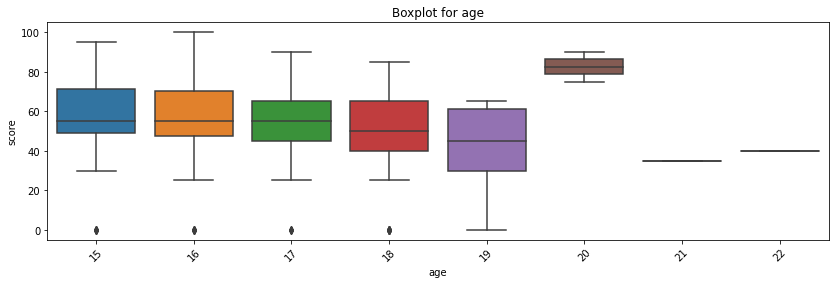

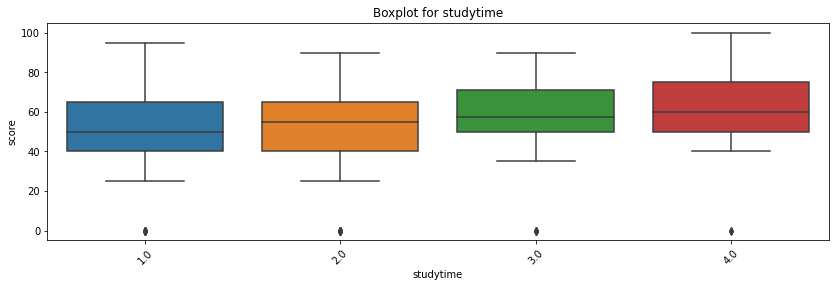

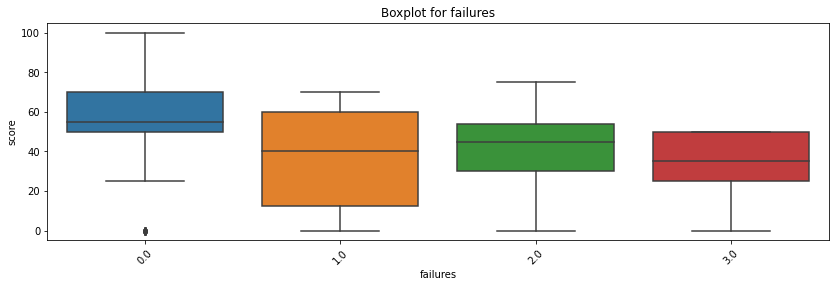

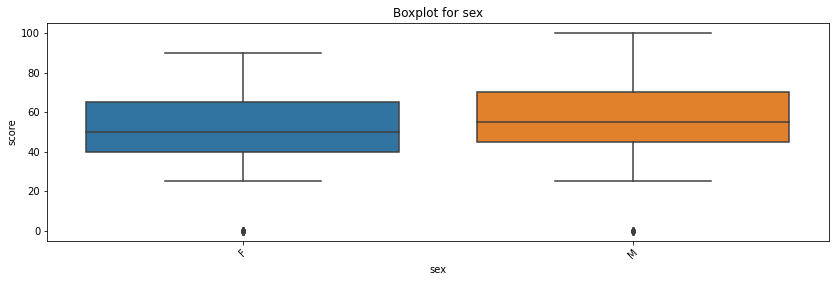

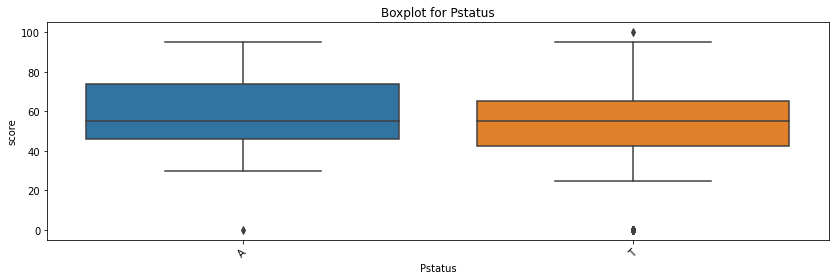

In [16]:
for col in ['age', 'studytime', 'failures', 'sex', 'Pstatus']:
    get_boxplot(col)

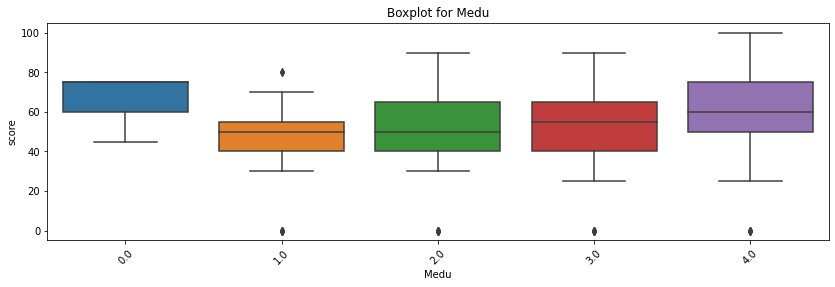

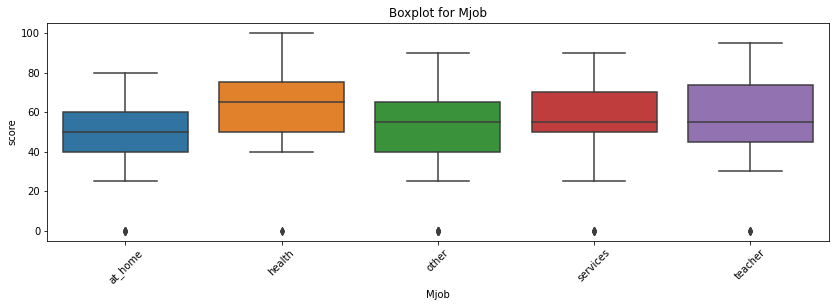

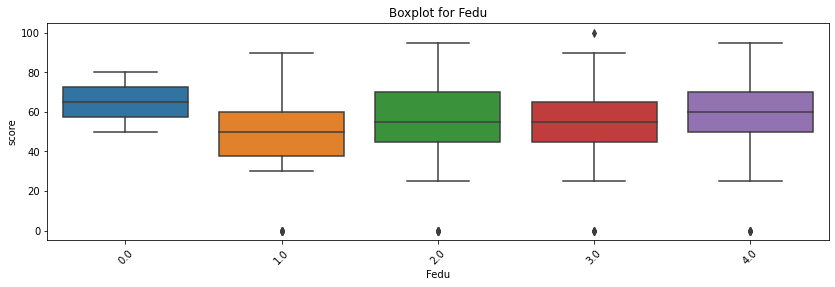

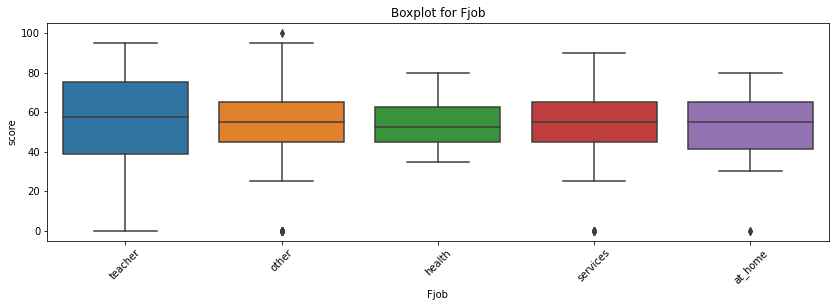

In [17]:
for col in ['Medu', 'Mjob', 'Fedu', 'Fjob']:
    get_boxplot(col)

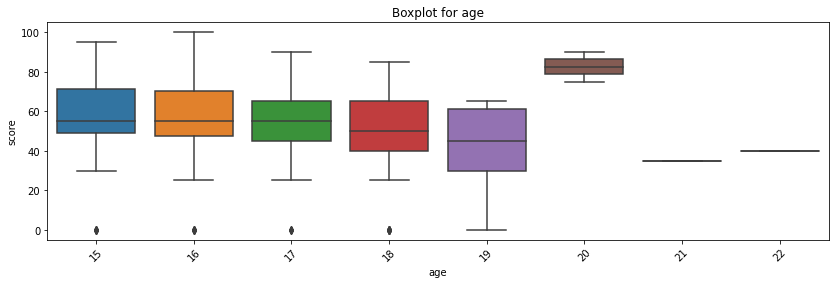

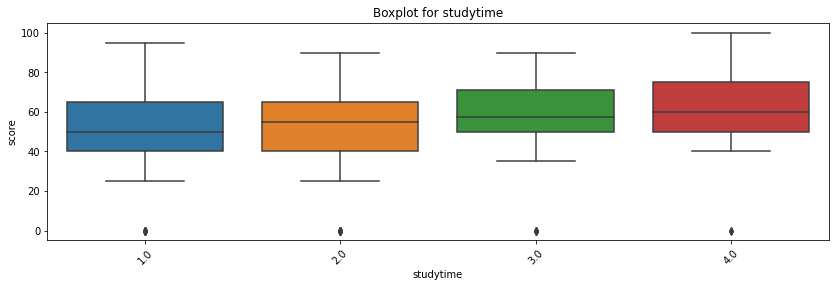

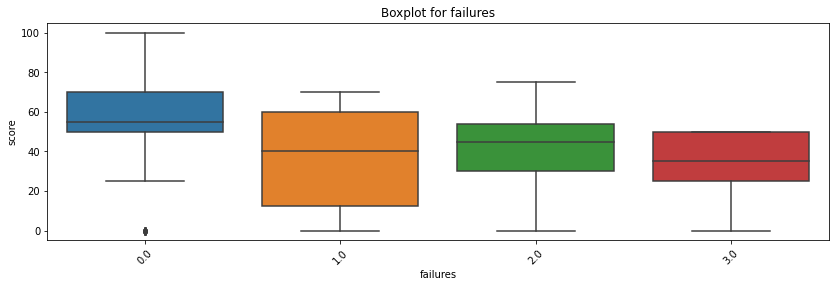

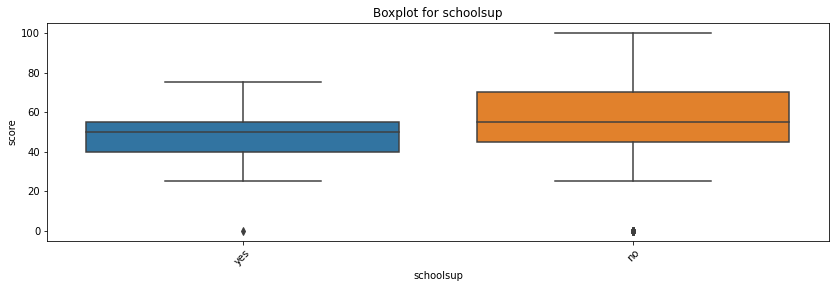

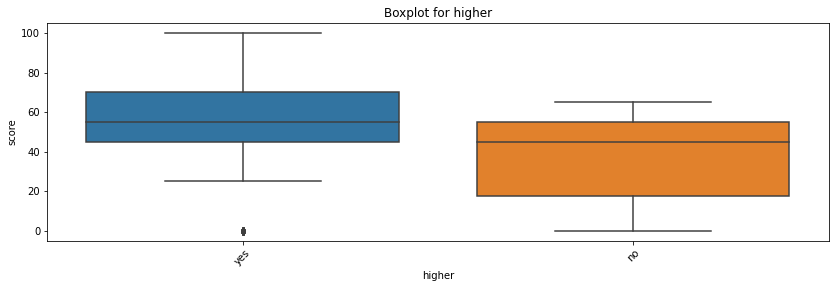

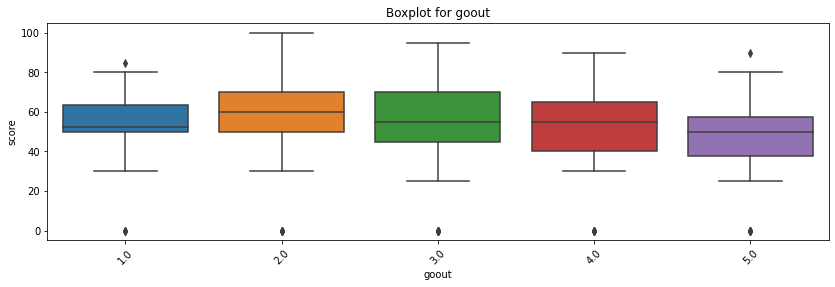

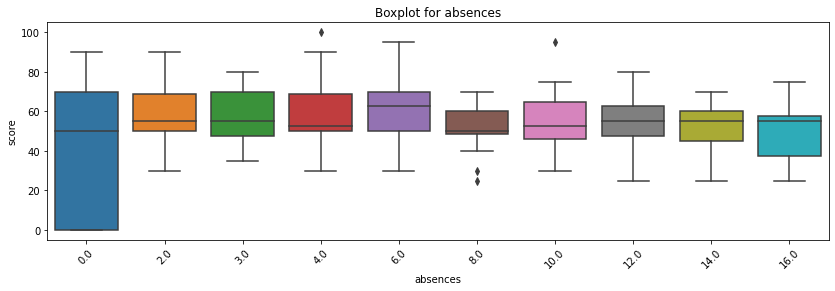

In [18]:
for col in ['age','studytime','failures','schoolsup','higher','goout','absences']:
    get_boxplot(col)

In [20]:
stud_for_model = stud.loc[:, ['age', 'Medu', 'Fedu', 'studytime', 'failures'
                              , 'schoolsup', 'higher', 'goout', 'absences', 'score']]
stud_for_model.head()

,age,Medu,Fedu,studytime,failures,schoolsup,higher,goout,absences,score
0,18,4.0,4.0,2.0,0.0,yes,yes,4.0,6.0,30.0
1,17,1.0,1.0,2.0,0.0,no,yes,3.0,4.0,30.0
2,15,1.0,1.0,2.0,3.0,yes,yes,2.0,10.0,50.0
3,15,4.0,2.0,3.0,0.0,no,yes,2.0,2.0,75.0
4,16,3.0,3.0,2.0,0.0,no,yes,2.0,4.0,50.0


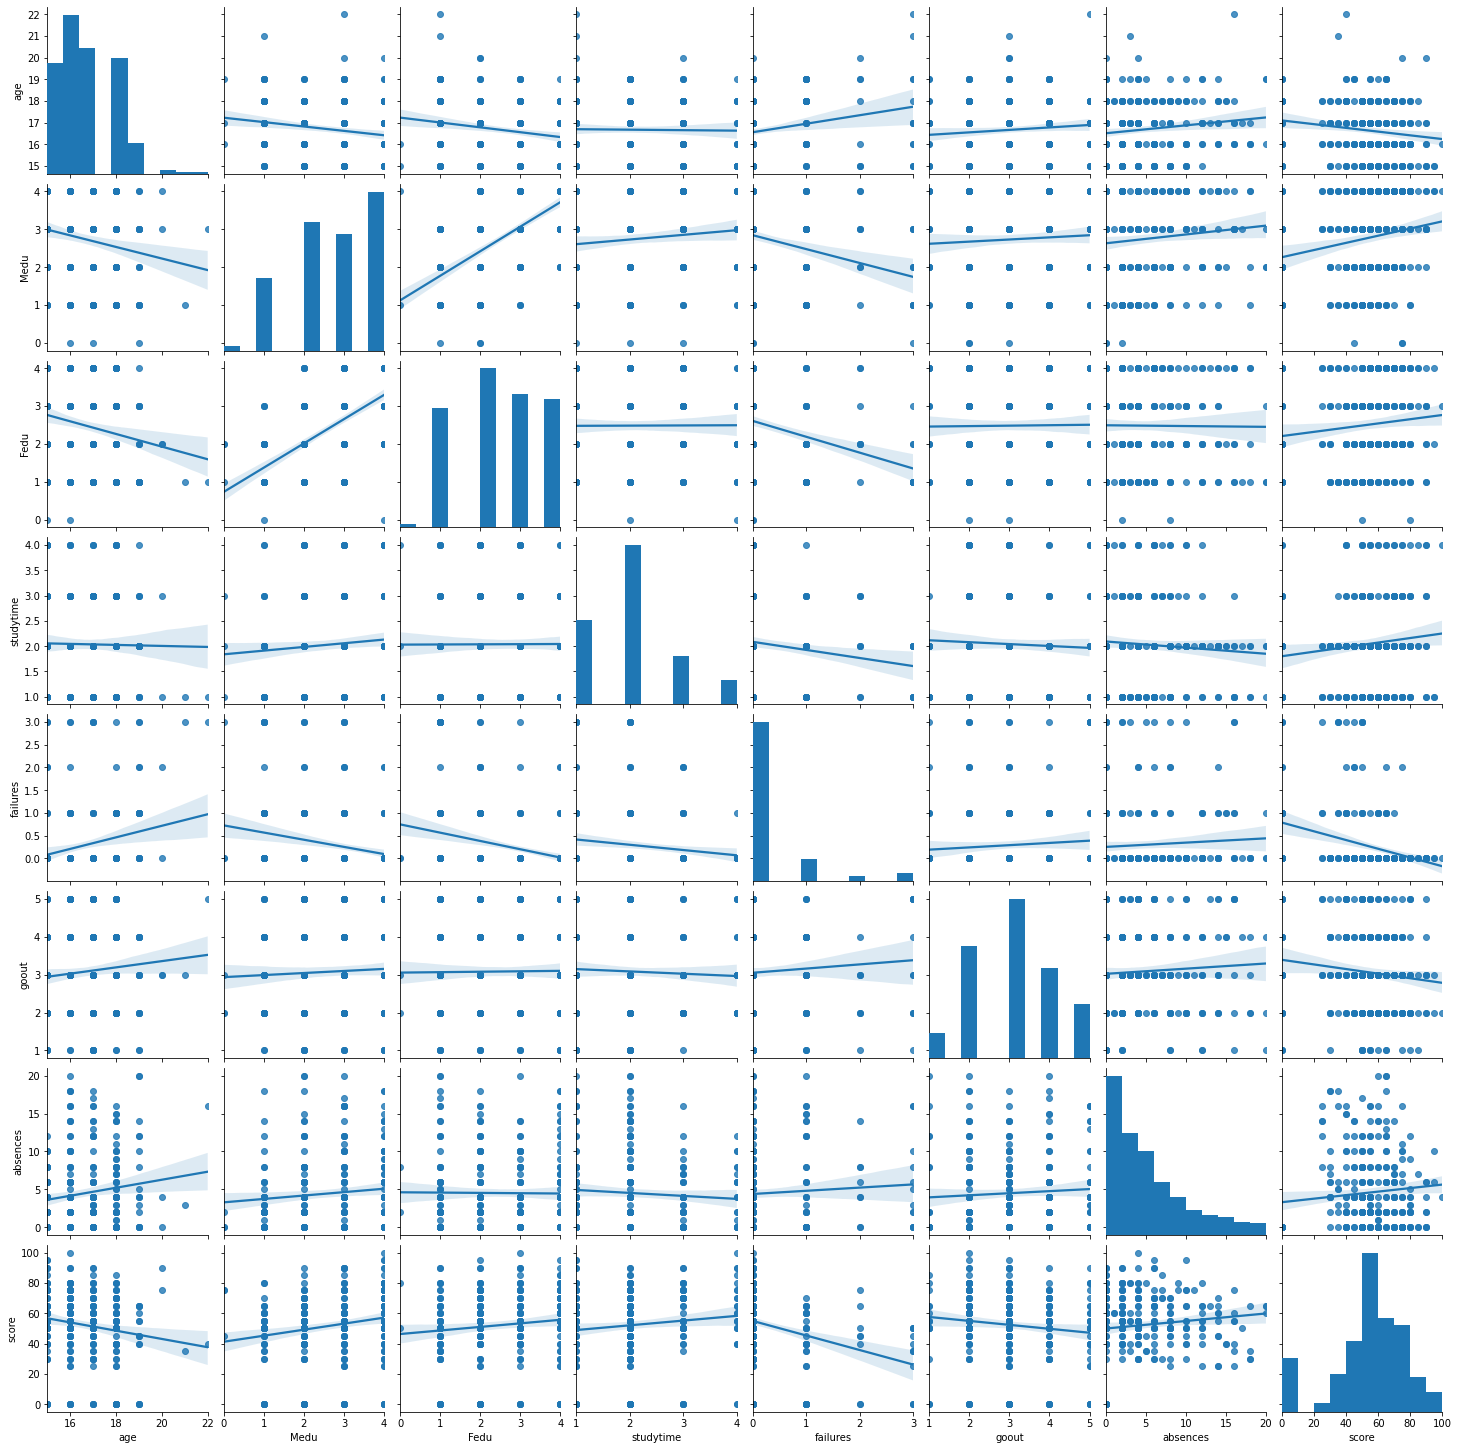

In [21]:
sns.pairplot(stud_for_model, kind = 'reg')

    Итак, в результате EDA для анализа  условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике 
    были получены следующие выводы:
   1. В данных достаточно мало пустых значений
   2. Выбросы найдены только в столбцах Fedu, famrel, absences 
   3. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, Medu, Fedu, studytime, failures, schoolsup, higher, goout, absences, score